# Template to prepare a data upload for your publication
- Copy this template file in your folder in which you keep all files (analysis+visualization) for your publication 
- This will only work with a connection to MySQL database 

## 1. Initialize publication
- Run the initialization, to create an entry in the 'publication' table, you can define an id, title and journal name for the publication
- The folder wherer this file is located will be linked to the publication
    - <span style="color:red">Do not move this file after initialization of the publication</span>

In [1]:
from evaluation.publication.publication_export import Publication
pub = Publication().create(id_publication='HTE02_Database',
            title='Accelerating materials research with a comprehensive data management tool: A case study on an electrochemical laboratory',
            name_journal='Journal of Materials Chemistry A',
           )

<IPython.core.display.Javascript object>

Already created!


## 2. Run your jupyter notebooks (analysis+visualization) to link all experiments to the publication
- Make sure you use db.get_exp() to request your experiments. 
- If successfully linked, you will see a message confirming the link creation

    - Like this: 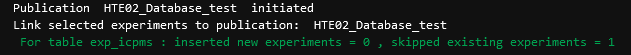
- Check what you already have linked with the cell below:

In [ ]:
# Check what you already have linked
df_publication_exp = pub.publication_exp()
if len(df_publication_exp.index) == 0:
    print('Nothing linked')
else:
    for name_table in df_publication_exp.name_table.unique().tolist():
        unstacked = df_publication_exp.loc[df_publication_exp.name_table == name_table] \
                        .set_index(['name_table', 'count_exp', 'name_index_col'])\
                        .unstack()
        unstacked.columns = unstacked.columns.get_level_values(level='name_index_col')
        print(name_table)
        print(unstacked.values)


<span style="color:red">Run the cell below only if you want to delete all experiment links (if you added a wrong experiment)</span> 

In [ ]:
# delete all experiment links (if you added a wrong experiment)
pub.remove_experiment_links()

## 3. Once you have linked all experiments, run the export function
- This will create an upload folder in the directory of this jupyter notebook
- The following will be added:
    - All files in the current directory (jupyter notebooks, svg files, any additional...)
    - All our self-developed modules from the 'evaluation' libray
    - A sqlite database file with data of the linked experiments
    - recquired files to launch the repository with mybinder.org
- Rerunning the script will delete the upload folder and recreate - so do not move files there manually

In [10]:
pub.export_to_upload(debug=False)

Upload folder already exists. Delete and continue data export?
	0: False
	1: True
Your choice:  1


Deleted old upload folder
Created upload folder  /home/hte_admin/sciebo/jupyter/n.roettcher/Publications/01_Database/published_data/upload
 Copy all required files to upload folder ... (This may take a while) 
Removed part of line, result:          config_file_path = Path(r"db_config.ini")  

Removed part of line, result:          config_file_path = Path("db_config.ini")  

Transfer experiments from ana_icpms_sfc_fitting  to DATABASE_DF
Transfer experiments from ana_icpms_sfc_fitting  to DATABASE_DF
Transfer experiments from ana_icpms_sfc_fitting  to DATABASE_DF
Transfer experiments from ana_icpms_sfc_fitting  to DATABASE_DF
Transfer experiments from ana_icpms_sfc_fitting  to DATABASE_DF
Transfer experiments from exp_icpms  to DATABASE_DF
Transfer experiments from exp_icpms  to DATABASE_DF
Transfer experiments from exp_icpms  to DATABASE_DF
Transfer experiments from exp_icpms  to DATABASE_DF
Transfer experiments from exp_icpms  to DATABASE_DF
Transfer experiments from exp_icpms_analyte

# Manually insert any missing entries

In [11]:
import pandas as pd
from evaluation.utils import db
from evaluation.publication import db_config_binder
with db_config_binder.connect(path_to_sqlite='upload/database/sqlite.db').begin() as con_sqlite:
    con_sqlite.execute('INSERT INTO samples_composition VALUES(1, "Pt", 100)')

# Overview of electrochemical experiments in exported sqlite database


In [12]:
import pandas as pd
from evaluation.utils import db
from evaluation.publication import db_config_binder
with db_config_binder.connect(path_to_sqlite='upload/database/sqlite.db').begin() as con_sqlite:
    display(pd.read_sql('SELECT * FROM exp_ec_expanded', con=con_sqlite))

,id_exp_sfc,name_user,name_setup_sfc,name_setup_sfc_alias,name_setup_sfc_feature,name_setup_sfc_type,t_start__timestamp,t_end__timestamp,rawdata_path,rawdata_computer,...,fg_top_purgevial_name_gas,fg_top_purgevial_flow_rate__mL_min,fg_top_main_name_gas,fg_top_main_flow_rate__mL_min,fg_bottom_Arring_name_gas,fg_bottom_Arring_flow_rate__mL_min,fg_bottom_purgevial_name_gas,fg_bottom_purgevial_flow_rate__mL_min,fg_bottom_main_name_gas,fg_bottom_main_flow_rate__mL_min
0,7373,n.roettcher,SFC_1,Sandwitch,GDE,SFC,2023-10-06 12:26:55.613,2023-10-06 12:33:30.613762,C:\Measurements\n.roettcher\20231006\20231006_...,IEK11189,...,Ar,131.0,None,None,None,None,None,None,None,None
1,7374,n.roettcher,SFC_1,Sandwitch,GDE,SFC,2023-10-06 12:34:40.599,2023-10-06 12:35:00.599038,C:\Measurements\n.roettcher\20231006\20231006_...,IEK11189,...,Ar,131.0,None,None,None,None,None,None,None,None
2,7375,n.roettcher,SFC_1,Sandwitch,GDE,SFC,2023-10-06 12:35:01.408,2023-10-06 12:36:33.388178,C:\Measurements\n.roettcher\20231006\20231006_...,IEK11189,...,Ar,131.0,None,None,None,None,None,None,None,None
3,7376,n.roettcher,SFC_1,Sandwitch,GDE,SFC,2023-10-06 12:36:44.490,2023-10-06 12:37:04.490038,C:\Measurements\n.roettcher\20231006\20231006_...,IEK11189,...,Ar,131.0,None,None,None,None,None,None,None,None
4,7377,n.roettcher,SFC_1,Sandwitch,GDE,SFC,2023-10-06 12:37:05.274,2023-10-06 12:37:08.454006,C:\Measurements\n.roettcher\20231006\20231006_...,IEK11189,...,Ar,131.0,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,7482,n.roettcher,SFC_1,Sandwitch,GDE,SFC,2023-10-06 18:47:52.843,2023-10-06 18:50:58.863355,C:\Measurements\n.roettcher\20231006\20231006_...,IEK11189,...,Ar,45.0,None,None,None,None,None,None,None,None
110,7483,n.roettcher,SFC_1,Sandwitch,GDE,SFC,2023-10-06 18:50:59.244,2023-10-06 18:58:44.294903,C:\Measurements\n.roettcher\20231006\20231006_...,IEK11189,...,Ar,45.0,None,None,None,None,None,None,None,None
111,7484,n.roettcher,SFC_1,Sandwitch,GDE,SFC,2023-10-06 18:58:44.894,2023-10-06 19:07:34.495013,C:\Measurements\n.roettcher\20231006\20231006_...,IEK11189,...,Ar,45.0,None,None,None,None,None,None,None,None
112,7485,n.roettcher,SFC_1,Sandwitch,GDE,SFC,2023-10-06 19:07:45.451,2023-10-06 19:08:05.451038,C:\Measurements\n.roettcher\20231006\20231006_...,IEK11189,...,Ar,45.0,None,None,None,None,None,None,None,None


# Overview mass spectrometric experiments  in exported sqlite database

In [6]:
import pandas as pd
from evaluation.utils import db
from evaluation.publication import db_config_binder
with db_config_binder.connect(path_to_sqlite='upload/database/sqlite.db').begin() as con_sqlite:
    display(pd.read_sql('SELECT * FROM exp_icpms_sfc_expanded', con=con_sqlite))

,id_exp_icpms,name_sample,name_user,name_setup_icpms,t_start__timestamp_icpms_pc,t_duration__s,t_duration_planned__s,type_experiment,plasma_mode,tune_mode,...,name_isotope_internalstandard,calibration_slope__countratio_mug_L,delta_calibration_slope__countratio_mug_L,calibration_intercept__countratio,delta_calibration_intercept__countratio,Rsquared,calibration_method,file_path_calibration_plot,name_computer_inserted_calibration_data,t_inserted_calibration_data__timestamp
0,404,SFC,n.roettcher,hte_1,2023-10-06 17:20:34,5852.95,49999.8,sfc-icpms,GeneralPurpose,No Gas,...,Re185,1.81039,0.252481,-0.001667,0.646785,0.999994,scipy.optimize.curve_fit,D:\Agilent\ICPMH\1\DATA\n.roettcher\20231006_P...,DESKTOP-CAN2PJU,2023-10-06 20:18:46.000000
